# Zad. 


  * Proszę pobrać dane z EUROWIZJI 2014.

  * Następnie dobrać najleprzy model hierarchiczny.
  
  * Z jakimi Państwami w grupie wylądowała POLSKA?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
dane = loadmat("./eu_song_2014.mat")["x"][0][0][0]
k1 = loadmat("./eu_song_2014.mat")["x"][0][0][1][0][0]
k2 = loadmat("./eu_song_2014.mat")["x"][0][0][5]
dane = pd.DataFrame(dane,columns=k2)
dane.set_index(k1,inplace=True)

In [3]:
dane.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0


In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

<Figure size 1800x720 with 0 Axes>

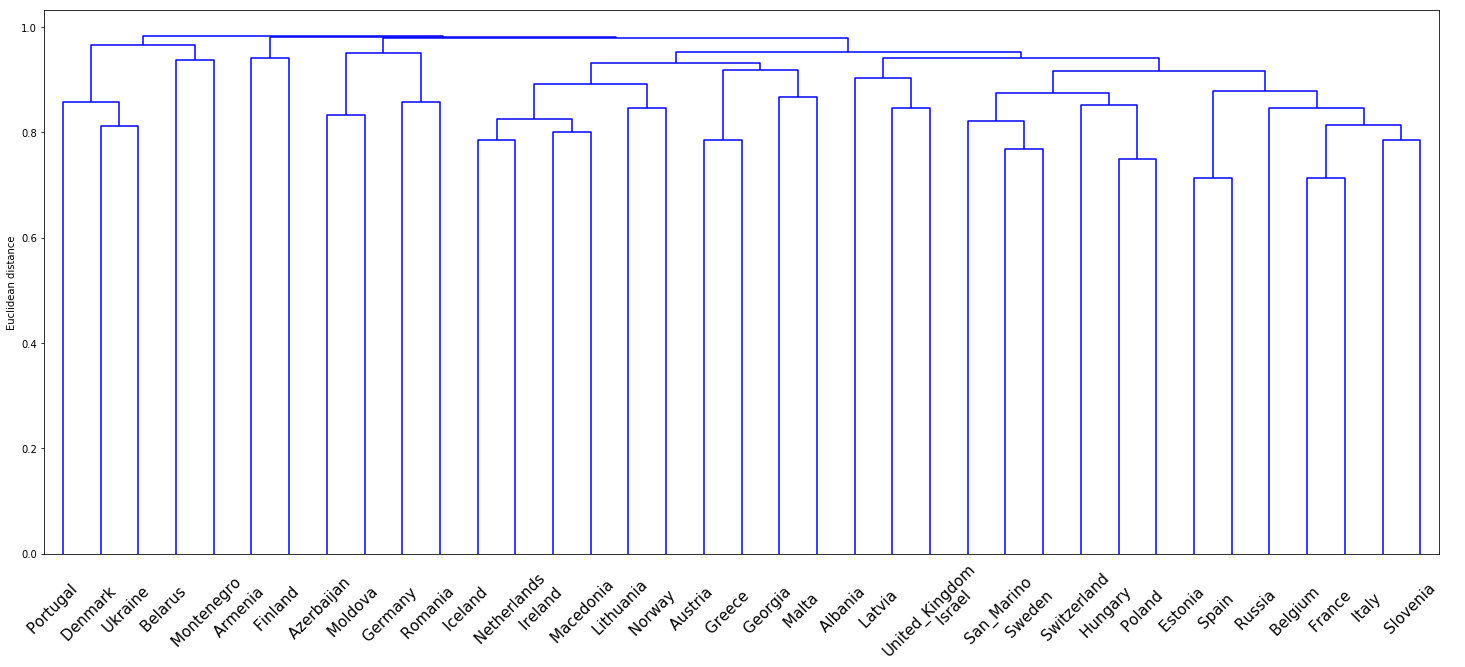

In [24]:
X = dane
df1 = pd.DataFrame(X)
df1

plt.figure(figsize=(25, 10))   
row_clusters = linkage(pdist(df1, metric='jaccard'), method='average') 
row_dendr = dendrogram(row_clusters,
           labels = dane.index, 
           leaf_rotation=45,
           leaf_font_size=15)

plt.ylabel('Euclidean distance')
plt.show()

In [25]:
part = fcluster(row_clusters, 7, 'maxclust')
part

array([7, 3, 6, 4, 2, 7, 1, 7, 3, 7, 6, 5, 6, 7, 6, 6, 7, 7, 7, 6, 6, 6,
       4, 2, 6, 6, 7, 1, 5, 7, 7, 7, 7, 7, 7, 1, 7], dtype=int32)

# Zad.

Możemy zwizualizować wynik na płaszczyźnie 

* t-SNE
* PCA

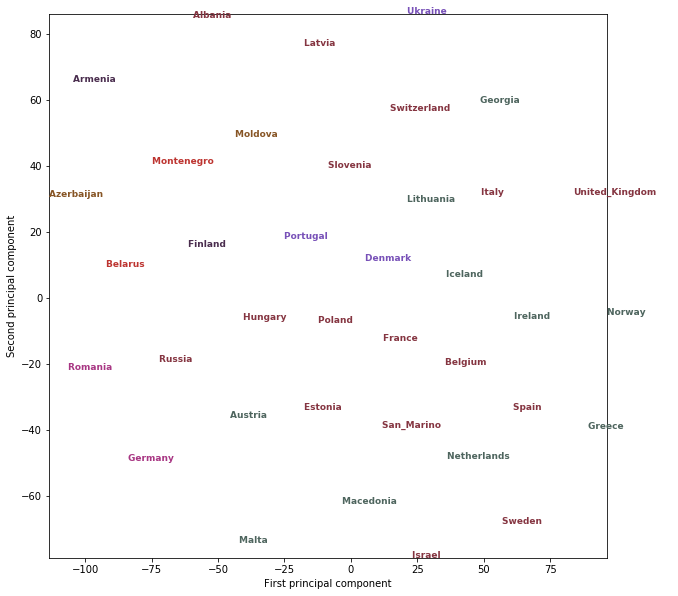

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(dane)

from matplotlib import colors as mcolors
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(dane.index[i]),
             color = colors[part[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()